<a href="https://colab.research.google.com/github/MuleHakim/Pytorch-Tutorial/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Conver MNIST Image files into a Tensor of 4D (# no of images, height, width, color channel)
transform = transforms.ToTensor()

In [3]:
# Train data
train_data = datasets.MNIST(root='./cnn_data', train=True, transform=transform, download=True)

In [4]:
# Test data
test_data = datasets.MNIST(root='./cnn_data', train=False, transform=transform, download=True)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
# Create a small batch size for images
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [8]:
# Define our CNN model
# Describe convolutional layer
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [9]:
# Grab 1 MNIST record/image
for i, (X_train,y_train) in enumerate(train_data):
  break

In [10]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
X_train.shape

torch.Size([1, 28, 28])

In [12]:
x = X_train.view(1,1,28,28)

In [13]:
# Perform our first convolution
x = F.relu(conv1(x)) # Rectified Linear Unit for our activation function

In [14]:
# 1 single image, 6 is the filters, 26x26
x.shape # We didn't set padding so we lose 2 pixels around outside of the image

torch.Size([1, 6, 26, 26])

In [15]:
# pass thru the pooling layer
x = F.max_pool2d(x,2,2)   # kernel of 2 and stride of 2

In [16]:
x.shape  # 26 / 2 =13

torch.Size([1, 6, 13, 13])

In [17]:
# Do our second convolutional layer
x = F.relu(conv2(x))

In [18]:
x.shape # Again we didn't set padding so we lose 2 pixels around outside of the image

torch.Size([1, 16, 11, 11])

In [19]:
# Pooling layer
x = F.max_pool2d(x,2,2)   # kernel of 2 and stride of 2

In [20]:
x.shape    # 11 / 2 = 5.5 but we have to round down, because you can't invent data to round up

torch.Size([1, 16, 5, 5])

In [21]:
# Model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,70)
    self.fc3 = nn.Linear(70,10)

  def forward(self,X):
    # First pass
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernel and stride of 2
    # Second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernel and stride of 2

    # Review to flatten it out
    X = X.view(-1,16*5*5)  # -1 so that we can  vary the batch size

    # Fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X,dim=1)

In [22]:
# Create an instance of our model
torch.manual_seed(97)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=10, bias=True)
)

In [23]:
# Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)  # smaller the lr, longer its gonna take to train

In [24]:
import time
start_time = time.time()

# Create variables to tracks things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


# For loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  # Train
  for batch, (X_train,y_train) in enumerate(train_loader):
    batch += 1  # start our batches at 1
    y_pred = model(X_train)  # get predicted values from training set, Not flattened
    loss = criterion(y_pred,y_train)   # how off are we? compare the predictions to correct answers in y_train
    predicted = torch.max(y_pred.data,1)[1]  # add up the number of correct predictions
    batch_corr = (predicted == y_train).sum()  # how many we got correct from this batch.
    trn_corr += batch_corr  # keep track as we go along in training.

    #Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if not (batch % 1000):
      print(f"Epoch: {i}    Batch: {batch}    Loss: {loss.item()}")

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Test
  with torch.no_grad(): # no gradient so we don't update our weights and biases with test data
     for batch, (X_test,y_test) in enumerate(test_loader):
        y_val = model(X_test)
        predicted = torch.max(y_val.data,1)[1]  # Adding up correct predictions
        tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f"Training took: {total/60} minutes!")

Epoch: 0    Batch: 1000    Loss: 0.1501670479774475
Epoch: 0    Batch: 2000    Loss: 1.1365047693252563
Epoch: 0    Batch: 3000    Loss: 0.4411250054836273
Epoch: 0    Batch: 4000    Loss: 0.4123738408088684
Epoch: 0    Batch: 5000    Loss: 0.06516142189502716
Epoch: 0    Batch: 6000    Loss: 0.014031568542122841
Epoch: 1    Batch: 1000    Loss: 0.20346002280712128
Epoch: 1    Batch: 2000    Loss: 0.9012969732284546
Epoch: 1    Batch: 3000    Loss: 0.9434664845466614
Epoch: 1    Batch: 4000    Loss: 0.0359991155564785
Epoch: 1    Batch: 5000    Loss: 0.12350813299417496
Epoch: 1    Batch: 6000    Loss: 0.48940420150756836
Epoch: 2    Batch: 1000    Loss: 0.8710128664970398
Epoch: 2    Batch: 2000    Loss: 0.49674105644226074
Epoch: 2    Batch: 3000    Loss: 0.2925414741039276
Epoch: 2    Batch: 4000    Loss: 0.07777974754571915
Epoch: 2    Batch: 5000    Loss: 0.3164289593696594
Epoch: 2    Batch: 6000    Loss: 0.027847742661833763
Epoch: 3    Batch: 1000    Loss: 0.18716570734977722
E

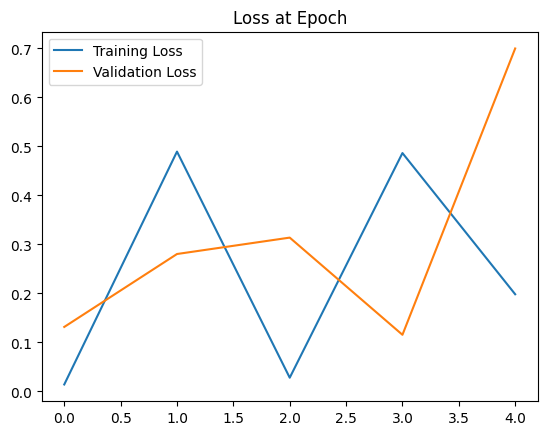

In [25]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses,label="Training Loss")
plt.plot(test_losses,label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

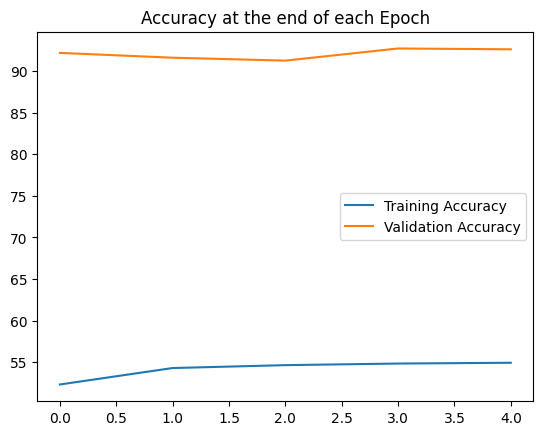

In [26]:
# Graph the accuracy at the end of each epoch
plt.plot([t/1000 for t in train_correct],label="Training Accuracy")
plt.plot([t/100 for t in test_correct],label="Validation Accuracy")
plt.title('Accuracy at the end of each Epoch')
plt.legend()

In [27]:
test_load_everything = DataLoader(test_data,batch_size=1000,shuffle=False)

In [28]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

In [29]:
# Did for correct
correct.item()/len(test_data)*100

92.62

In [57]:
# Grab an image
test_data[1000]  # Tensor with an image in it...at end it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [58]:
# Grab just the data
test_data[1000][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [59]:
# Reshape it
test_data[1000][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

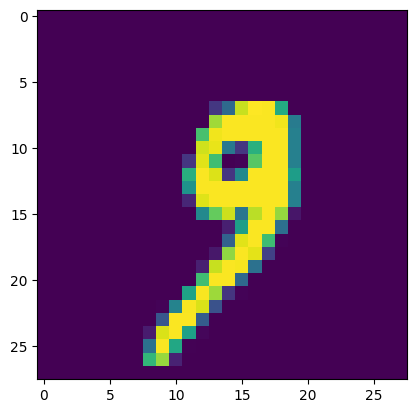

In [60]:
# Show image
plt.imshow(test_data[1000][0].reshape(28,28))

In [61]:
# Pass the image through our model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[2233][0].view(1,1,28,28))   # batch size of 1,1 color channl, 28x28 image


In [62]:
# Check the new prediction
new_prediction

tensor([[-17.1375, -12.2676, -13.8774,  -9.3507,  -6.0417,  -6.2739, -17.0893,
          -6.9304,  -0.7307,  -0.6673]])

In [63]:
new_prediction.argmax()

tensor(9)